In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
y = df.iloc[0:100, 4].values

In [9]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [14]:
x = df.iloc[0:100, [0, 2]].values

In [19]:
plt.scatter(x[:50, 0], x[:50, 1],
           color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1],
           color='blue', marker='x', label='versicolor')
plt.legend(loc='upper left')
plt.xlabel('sepal length [cm]') 
plt.ylabel('petal length [cm]')

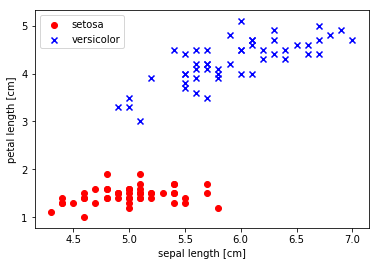

In [20]:
plt.show()

In [22]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    -----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset.
    random_state: int
        Random number generator seed for random weight initialization.
    
    Attributes
    -----------
    w_: 1d-array
        Weights after fitting.
    errors_: list
        Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        -----------
        X: {array-like}, shape= [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y: array-like, shape= [n_samples]
            Target values.
        
        Returns
        -----------
        self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                             size=1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
                
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [25]:
ppn = Perceptron(eta=0.1, n_iter=10)

In [26]:
ppn.fit(x, y)

In [27]:
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker='o')

In [28]:
plt.xlabel('Epochs')

In [29]:
plt.ylabel('Number of unpdates')

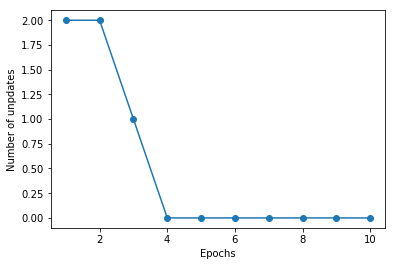

In [30]:
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    makers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    

In [56]:
indexs = pd.Series(['A', 'B'])

In [60]:
test = pd.DataFrame(
    {'a': 1,
     'b': [1, 2]})

In [61]:
test

,a,b
0,1,1
1,1,2


In [67]:
test1 = test.replace(2, 3, inplace=True)

In [70]:
test1

In [71]:
test

,a,b
0,1,1
1,1,3
